# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv('house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
assert df.shape == (1460, 80)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


6.509812011089439

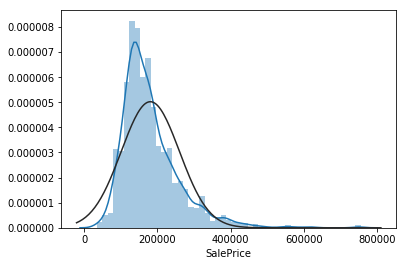

In [5]:
sns.distplot(df.SalePrice, fit=scipy.stats.norm)
scipy.stats.kurtosis(df.SalePrice)

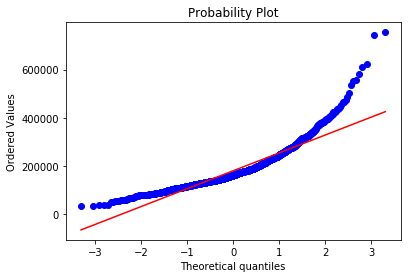

In [6]:
s = scipy.stats.probplot(df.SalePrice, plot=plt)
plt.show()

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


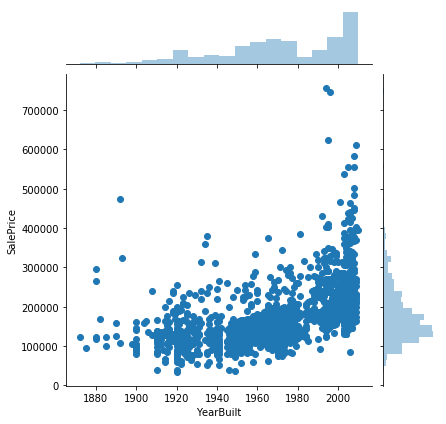

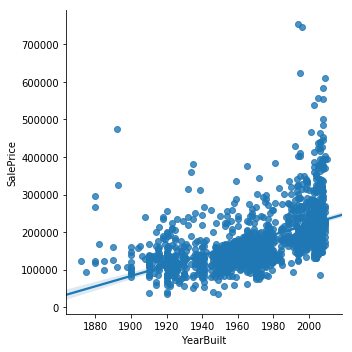

In [8]:
sns.jointplot(data=df, x='YearBuilt', y='SalePrice')
sns.lmplot(data=df,  x='YearBuilt', y='SalePrice')

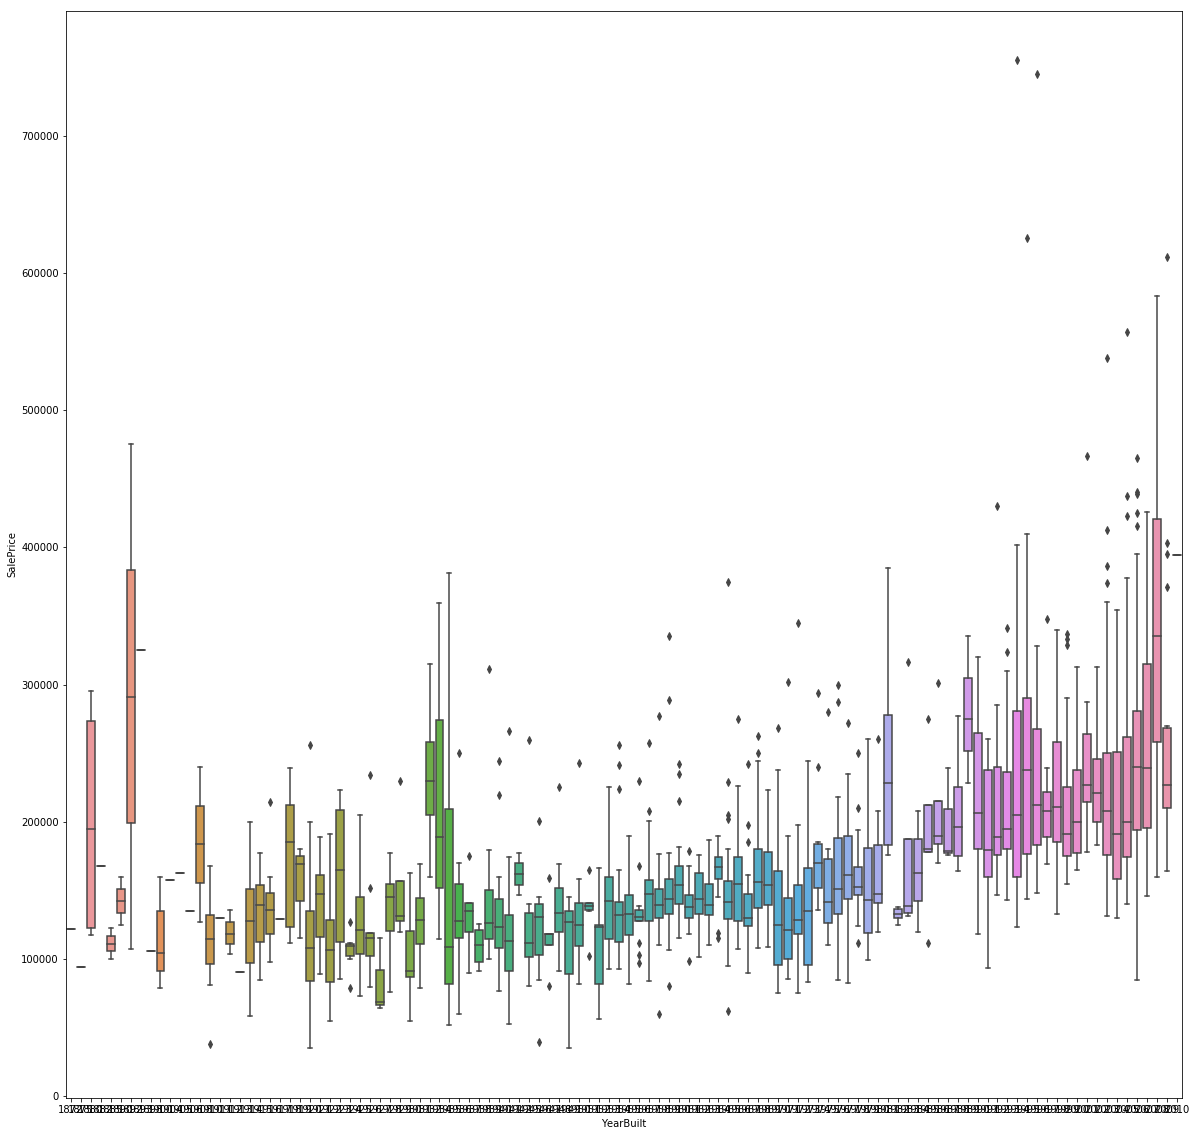

In [9]:
fig, ax = plt.subplots(figsize=(20,20))

sns.boxplot(data=df, x='YearBuilt', y='SalePrice', ax=ax)

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: unsupported operand type(s) for /: 'str' and 'float'

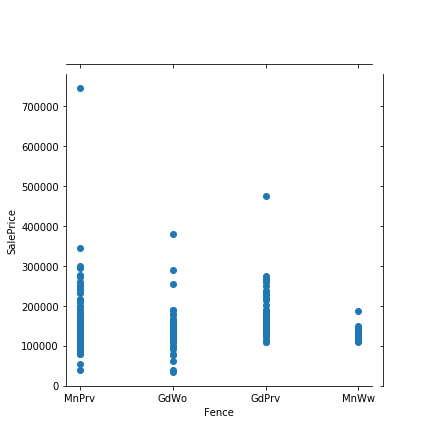

In [10]:
sns.jointplot(data=df, x='Fence', y='SalePrice')
#sns.lmplot(data=df,  x='Fence', y='SalePrice')

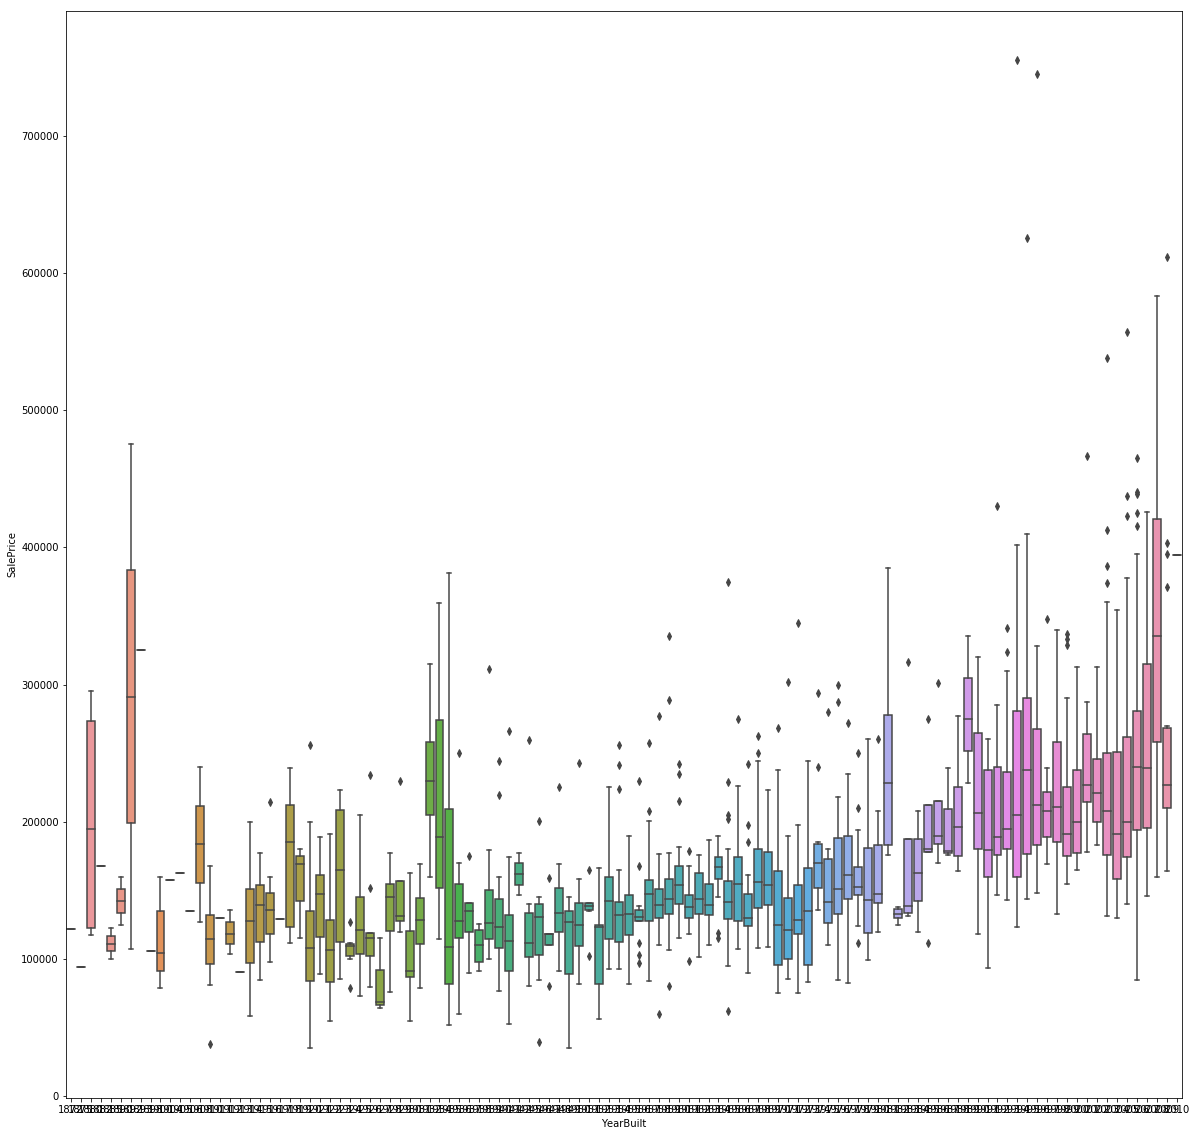

In [10]:
fig, ax = plt.subplots(figsize=(20,20))

sns.boxplot(data=df, x='YearBuilt', y='SalePrice', ax=ax)

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

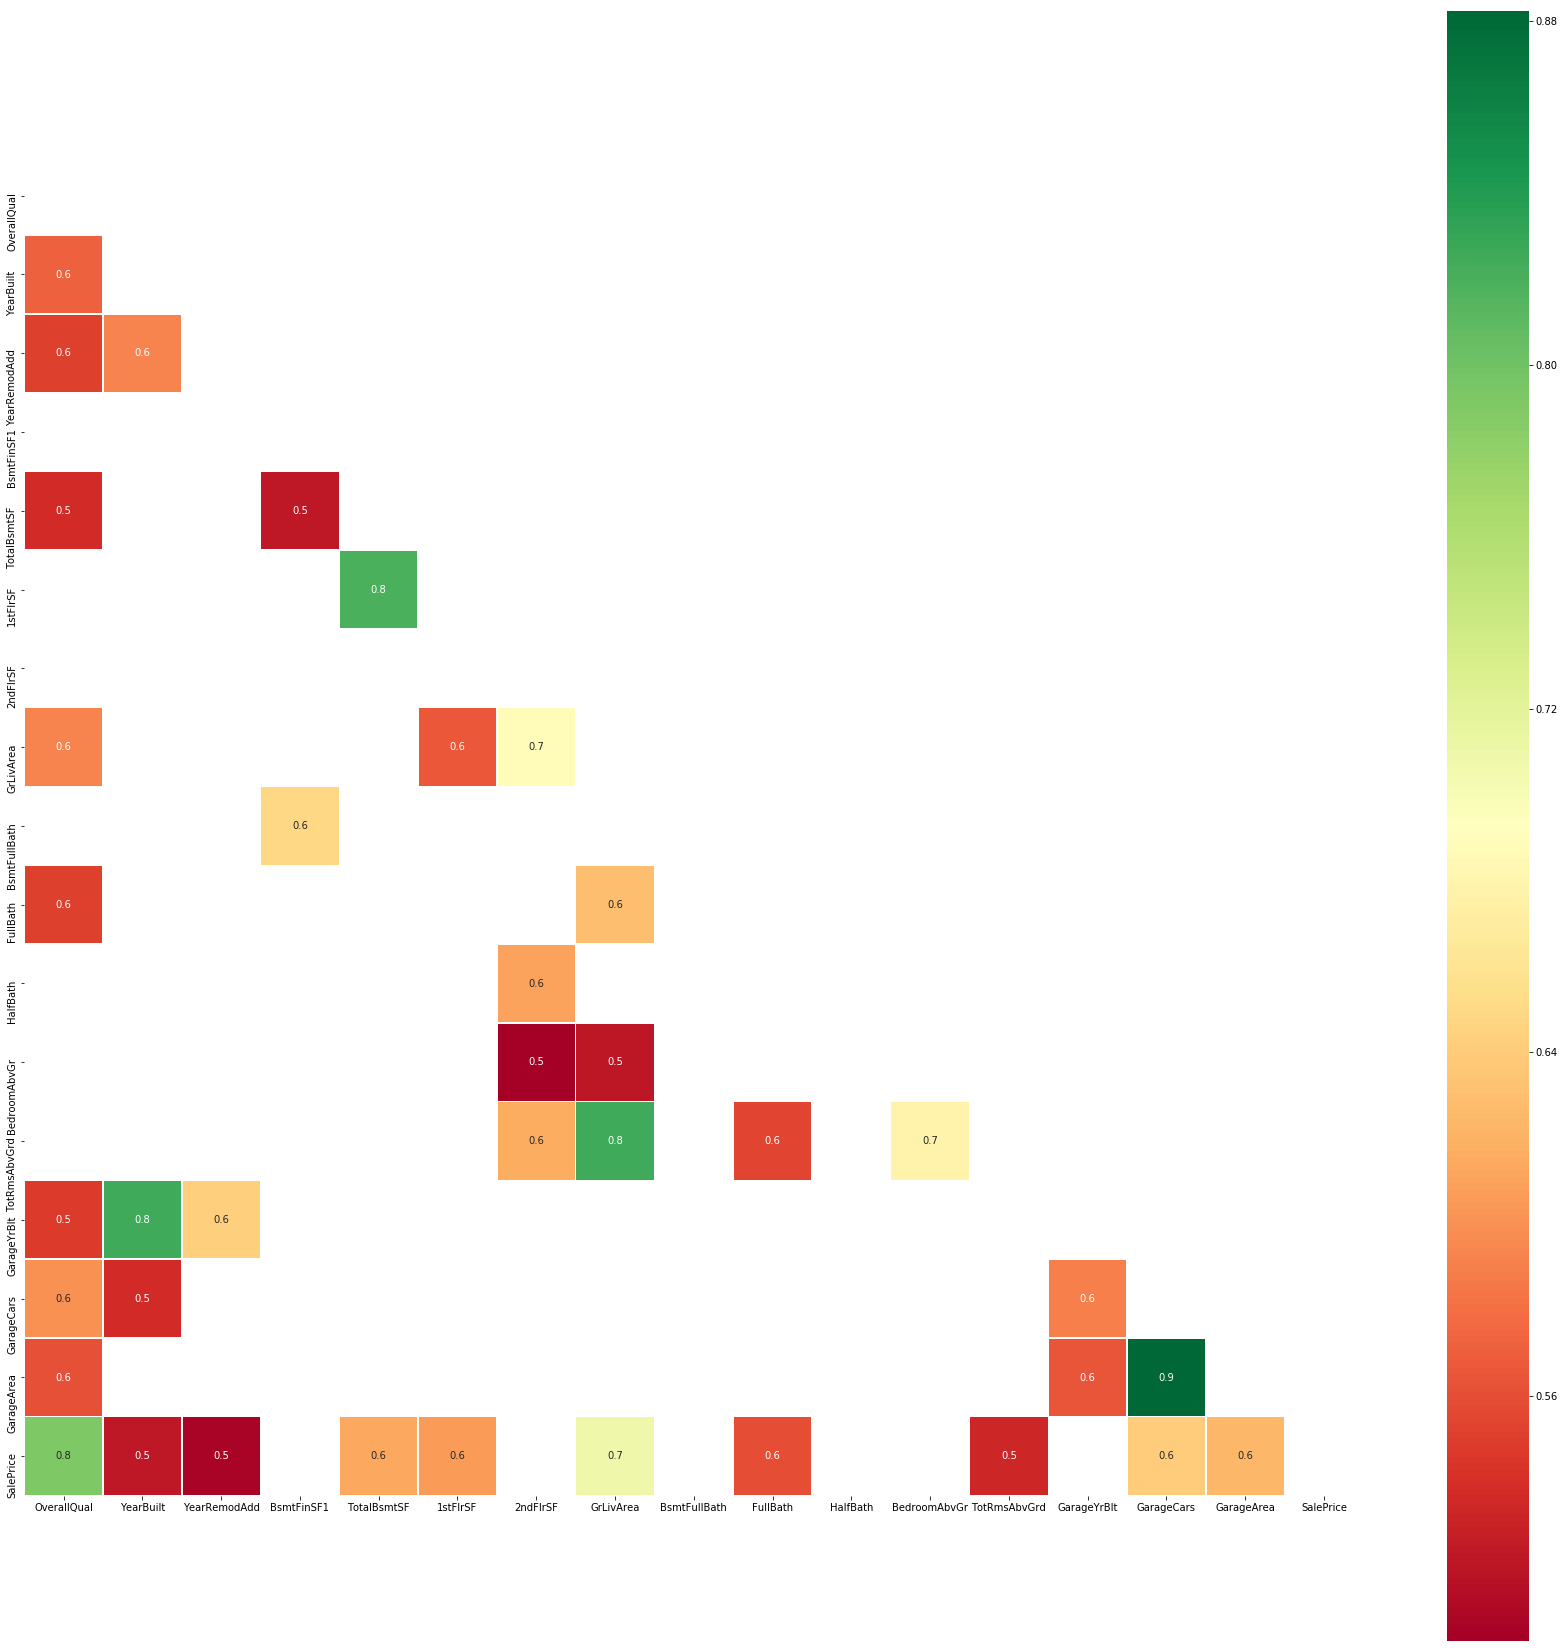

In [11]:
fig, ax = plt.subplots(figsize=(30,30))


corr = np.abs(df.corr())

corr = corr[corr >= 0.5]
corr = corr[corr != 1.0]

corr = corr.dropna(how='all')
corr = corr.dropna(how='all',axis='columns')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap="RdYlGn", square=True, linewidths=.5, mask=mask,annot=True, fmt=".1f",ax=ax)
#sns.heatmap(corr, square=True, linewidths=.5,annot=True, cmap="RdYlGn")


In [12]:
for i in corr.index:
    for j in corr.index:
        if corr[i][j] >= 0.5:
            print(i, end=':')
            print(j)

OverallQual:YearBuilt
OverallQual:YearRemodAdd
OverallQual:TotalBsmtSF
OverallQual:GrLivArea
OverallQual:FullBath
OverallQual:GarageYrBlt
OverallQual:GarageCars
OverallQual:GarageArea
OverallQual:SalePrice
YearBuilt:OverallQual
YearBuilt:YearRemodAdd
YearBuilt:GarageYrBlt
YearBuilt:GarageCars
YearBuilt:SalePrice
YearRemodAdd:OverallQual
YearRemodAdd:YearBuilt
YearRemodAdd:GarageYrBlt
YearRemodAdd:SalePrice
BsmtFinSF1:TotalBsmtSF
BsmtFinSF1:BsmtFullBath
TotalBsmtSF:OverallQual
TotalBsmtSF:BsmtFinSF1
TotalBsmtSF:1stFlrSF
TotalBsmtSF:SalePrice
1stFlrSF:TotalBsmtSF
1stFlrSF:GrLivArea
1stFlrSF:SalePrice
2ndFlrSF:GrLivArea
2ndFlrSF:HalfBath
2ndFlrSF:BedroomAbvGr
2ndFlrSF:TotRmsAbvGrd
GrLivArea:OverallQual
GrLivArea:1stFlrSF
GrLivArea:2ndFlrSF
GrLivArea:FullBath
GrLivArea:BedroomAbvGr
GrLivArea:TotRmsAbvGrd
GrLivArea:SalePrice
BsmtFullBath:BsmtFinSF1
FullBath:OverallQual
FullBath:GrLivArea
FullBath:TotRmsAbvGrd
FullBath:SalePrice
HalfBath:2ndFlrSF
BedroomAbvGr:2ndFlrSF
BedroomAbvGr:GrLivArea


Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [13]:
df_copy = df.copy()

for i in df_copy.columns:
    miss_count = df_copy[i].isna().sum() #Посчитайте общее количество пропущенных данных по каждому признаку
    miss = miss_count * (100.0 / df_copy[i].values.size) #посчитайте долю пропущенных данных выборки
    print(i)
    print(miss_count)
    print(miss)
    if miss >= 10.0:
        df_copy.drop(i, axis=1, inplace=True) #удалите из выборки признаки, доля пропущенных которых больще 10%
        continue
    if df_copy[i].dtype == np.object:
        df_copy.fillna({i:'unknown'}, inplace=True) #пропущенные категориальные заполните словом 'unknown' (у них dtype object)
        continue
    df_copy.fillna({i:df_copy[i].mean()}, inplace=True) #пропущенные числовые заполните средним (у них dtype float)
         

MSSubClass
0
0.0
MSZoning
0
0.0
LotFrontage
259
17.73972602739726
LotArea
0
0.0
Street
0
0.0
Alley
1369
93.76712328767123
LotShape
0
0.0
LandContour
0
0.0
Utilities
0
0.0
LotConfig
0
0.0
LandSlope
0
0.0
Neighborhood
0
0.0
Condition1
0
0.0
Condition2
0
0.0
BldgType
0
0.0
HouseStyle
0
0.0
OverallQual
0
0.0
OverallCond
0
0.0
YearBuilt
0
0.0
YearRemodAdd
0
0.0
RoofStyle
0
0.0
RoofMatl
0
0.0
Exterior1st
0
0.0
Exterior2nd
0
0.0
MasVnrType
8
0.547945205479452
MasVnrArea
8
0.547945205479452
ExterQual
0
0.0
ExterCond
0
0.0
Foundation
0
0.0
BsmtQual
37
2.5342465753424657
BsmtCond
37
2.5342465753424657
BsmtExposure
38
2.602739726027397
BsmtFinType1
37
2.5342465753424657
BsmtFinSF1
0
0.0
BsmtFinType2
38
2.602739726027397
BsmtFinSF2
0
0.0
BsmtUnfSF
0
0.0
TotalBsmtSF
0
0.0
Heating
0
0.0
HeatingQC
0
0.0
CentralAir
0
0.0
Electrical
1
0.0684931506849315
1stFlrSF
0
0.0
2ndFlrSF
0
0.0
LowQualFinSF
0
0.0
GrLivArea
0
0.0
BsmtFullBath
0
0.0
BsmtHalfBath
0
0.0
FullBath
0
0.0
HalfBath
0
0.0
BedroomAbvGr
0
0.0

In [14]:
for i in df_copy.columns:
    miss_count = df_copy[i].isna().sum()
    miss = miss_count * (100.0 / df_copy[i].values.size)
    print(i)
    print(miss_count)
    print(miss)
#Проверка что нет пропущеных теперь

MSSubClass
0
0.0
MSZoning
0
0.0
LotArea
0
0.0
Street
0
0.0
LotShape
0
0.0
LandContour
0
0.0
Utilities
0
0.0
LotConfig
0
0.0
LandSlope
0
0.0
Neighborhood
0
0.0
Condition1
0
0.0
Condition2
0
0.0
BldgType
0
0.0
HouseStyle
0
0.0
OverallQual
0
0.0
OverallCond
0
0.0
YearBuilt
0
0.0
YearRemodAdd
0
0.0
RoofStyle
0
0.0
RoofMatl
0
0.0
Exterior1st
0
0.0
Exterior2nd
0
0.0
MasVnrType
0
0.0
MasVnrArea
0
0.0
ExterQual
0
0.0
ExterCond
0
0.0
Foundation
0
0.0
BsmtQual
0
0.0
BsmtCond
0
0.0
BsmtExposure
0
0.0
BsmtFinType1
0
0.0
BsmtFinSF1
0
0.0
BsmtFinType2
0
0.0
BsmtFinSF2
0
0.0
BsmtUnfSF
0
0.0
TotalBsmtSF
0
0.0
Heating
0
0.0
HeatingQC
0
0.0
CentralAir
0
0.0
Electrical
0
0.0
1stFlrSF
0
0.0
2ndFlrSF
0
0.0
LowQualFinSF
0
0.0
GrLivArea
0
0.0
BsmtFullBath
0
0.0
BsmtHalfBath
0
0.0
FullBath
0
0.0
HalfBath
0
0.0
BedroomAbvGr
0
0.0
KitchenAbvGr
0
0.0
KitchenQual
0
0.0
TotRmsAbvGrd
0
0.0
Functional
0
0.0
Fireplaces
0
0.0
GarageType
0
0.0
GarageYrBlt
0
0.0
GarageFinish
0
0.0
GarageCars
0
0.0
GarageArea
0
0.0
Garag

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [15]:
df_copy = pd.get_dummies(df_copy)
df_copy.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 281 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(245)
memory usage: 771.3 KB


In [17]:
X = df_copy.drop('SalePrice', axis=1).values
y = df_copy['SalePrice'].values

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
for coef, col in sorted(zip(reg.coef_, df_copy.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

0.1095 	 MiscVal
0.7671 	 LotArea
-1.908 	 BsmtUnfSF
3.4565 	 OpenPorchSF
4.6764 	 EnclosedPorch
7.1427 	 BsmtFinSF2
13.3537 	 WoodDeckSF
16.0158 	 1stFlrSF
16.8575 	 BsmtFinSF1
18.0219 	 GarageArea
18.7499 	 MasVnrArea
-20.2862 	 LowQualFinSF
22.0922 	 TotalBsmtSF
-27.0783 	 GarageYrBlt
28.4686 	 ScreenPorch
31.0945 	 GrLivArea
-31.5094 	 MSSubClass
32.5697 	 3SsnPorch
35.365 	 2ndFlrSF
-84.5704 	 Exterior2nd_Wd Sdng
85.149 	 PoolArea
97.2324 	 YearRemodAdd
129.848 	 MasVnrType_BrkCmn
-146.3937 	 HeatingQC_TA
146.3937 	 CentralAir_N
-164.6147 	 GarageType_unknown
-244.529 	 GarageFinish_RFn
-277.1818 	 Functional_Min2
320.705 	 YearBuilt
-374.2704 	 GarageType_Basment
-403.9409 	 YrSold
424.006 	 Exterior2nd_ImStucc
-436.5313 	 MoSold
-457.1679 	 Heating_GasW
-509.164 	 LotShape_Reg
509.9372 	 Functional_Maj1
-527.873 	 BsmtFinType1_ALQ
-538.0392 	 Exterior2nd_AsphShn
541.838 	 BsmtFinType1_Rec
-618.6737 	 BsmtHalfBath
-644.1241 	 ExterCond_Ex
-649.5959 	 Exterior1st_CBlock
706.8883 	

In [53]:
from sklearn.model_selection import cross_val_score
errors = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')  
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))


[-8.25283878e+08 -1.17623540e+09 -1.41440984e+09 -5.70497624e+08
 -2.18007954e+09]
error=1233301257.107, std=554658957.3188


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

In [54]:
cross_val_score(reg, X, y, cv=5) 

array([0.85083335, 0.82098699, 0.81334817, 0.88738374, 0.67487556])

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [56]:
from sklearn.linear_model import Lasso, Ridge
alpha = 500

In [57]:

lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

for coef, col in sorted(zip(lasso.coef_, df_copy.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    

-0.0 	 BsmtHalfBath
0.0 	 HalfBath
-0.0 	 KitchenAbvGr
-0.0 	 SalePrice
0.0 	 MSZoning_C (all)
-0.0 	 MSZoning_FV
0.0 	 MSZoning_RH
-0.0 	 MSZoning_RM
0.0 	 Street_Grvl
0.0 	 Street_Pave
0.0 	 LotShape_IR1
-0.0 	 LotShape_IR2
-0.0 	 LotShape_IR3
0.0 	 LandContour_Bnk
0.0 	 LandContour_HLS
0.0 	 LandContour_Low
0.0 	 LandContour_Lvl
-0.0 	 Utilities_AllPub
-0.0 	 Utilities_NoSeWa
-0.0 	 LotConfig_CulDSac
-0.0 	 LotConfig_FR2
-0.0 	 LotConfig_FR3
-0.0 	 LotConfig_Inside
0.0 	 LandSlope_Gtl
-0.0 	 LandSlope_Mod
-0.0 	 LandSlope_Sev
-0.0 	 Neighborhood_Blmngtn
-0.0 	 Neighborhood_Blueste
0.0 	 Neighborhood_BrDale
0.0 	 Neighborhood_BrkSide
-0.0 	 Neighborhood_ClearCr
-0.0 	 Neighborhood_Edwards
-0.0 	 Neighborhood_Gilbert
0.0 	 Neighborhood_IDOTRR
-0.0 	 Neighborhood_MeadowV
-0.0 	 Neighborhood_Mitchel
0.0 	 Neighborhood_NAmes
-0.0 	 Neighborhood_NPkVill
-0.0 	 Neighborhood_NridgHt
-0.0 	 Neighborhood_OldTown
-0.0 	 Neighborhood_SWISU
-0.0 	 Neighborhood_Sawyer
0.0 	 Neighborhood_SawyerW
-

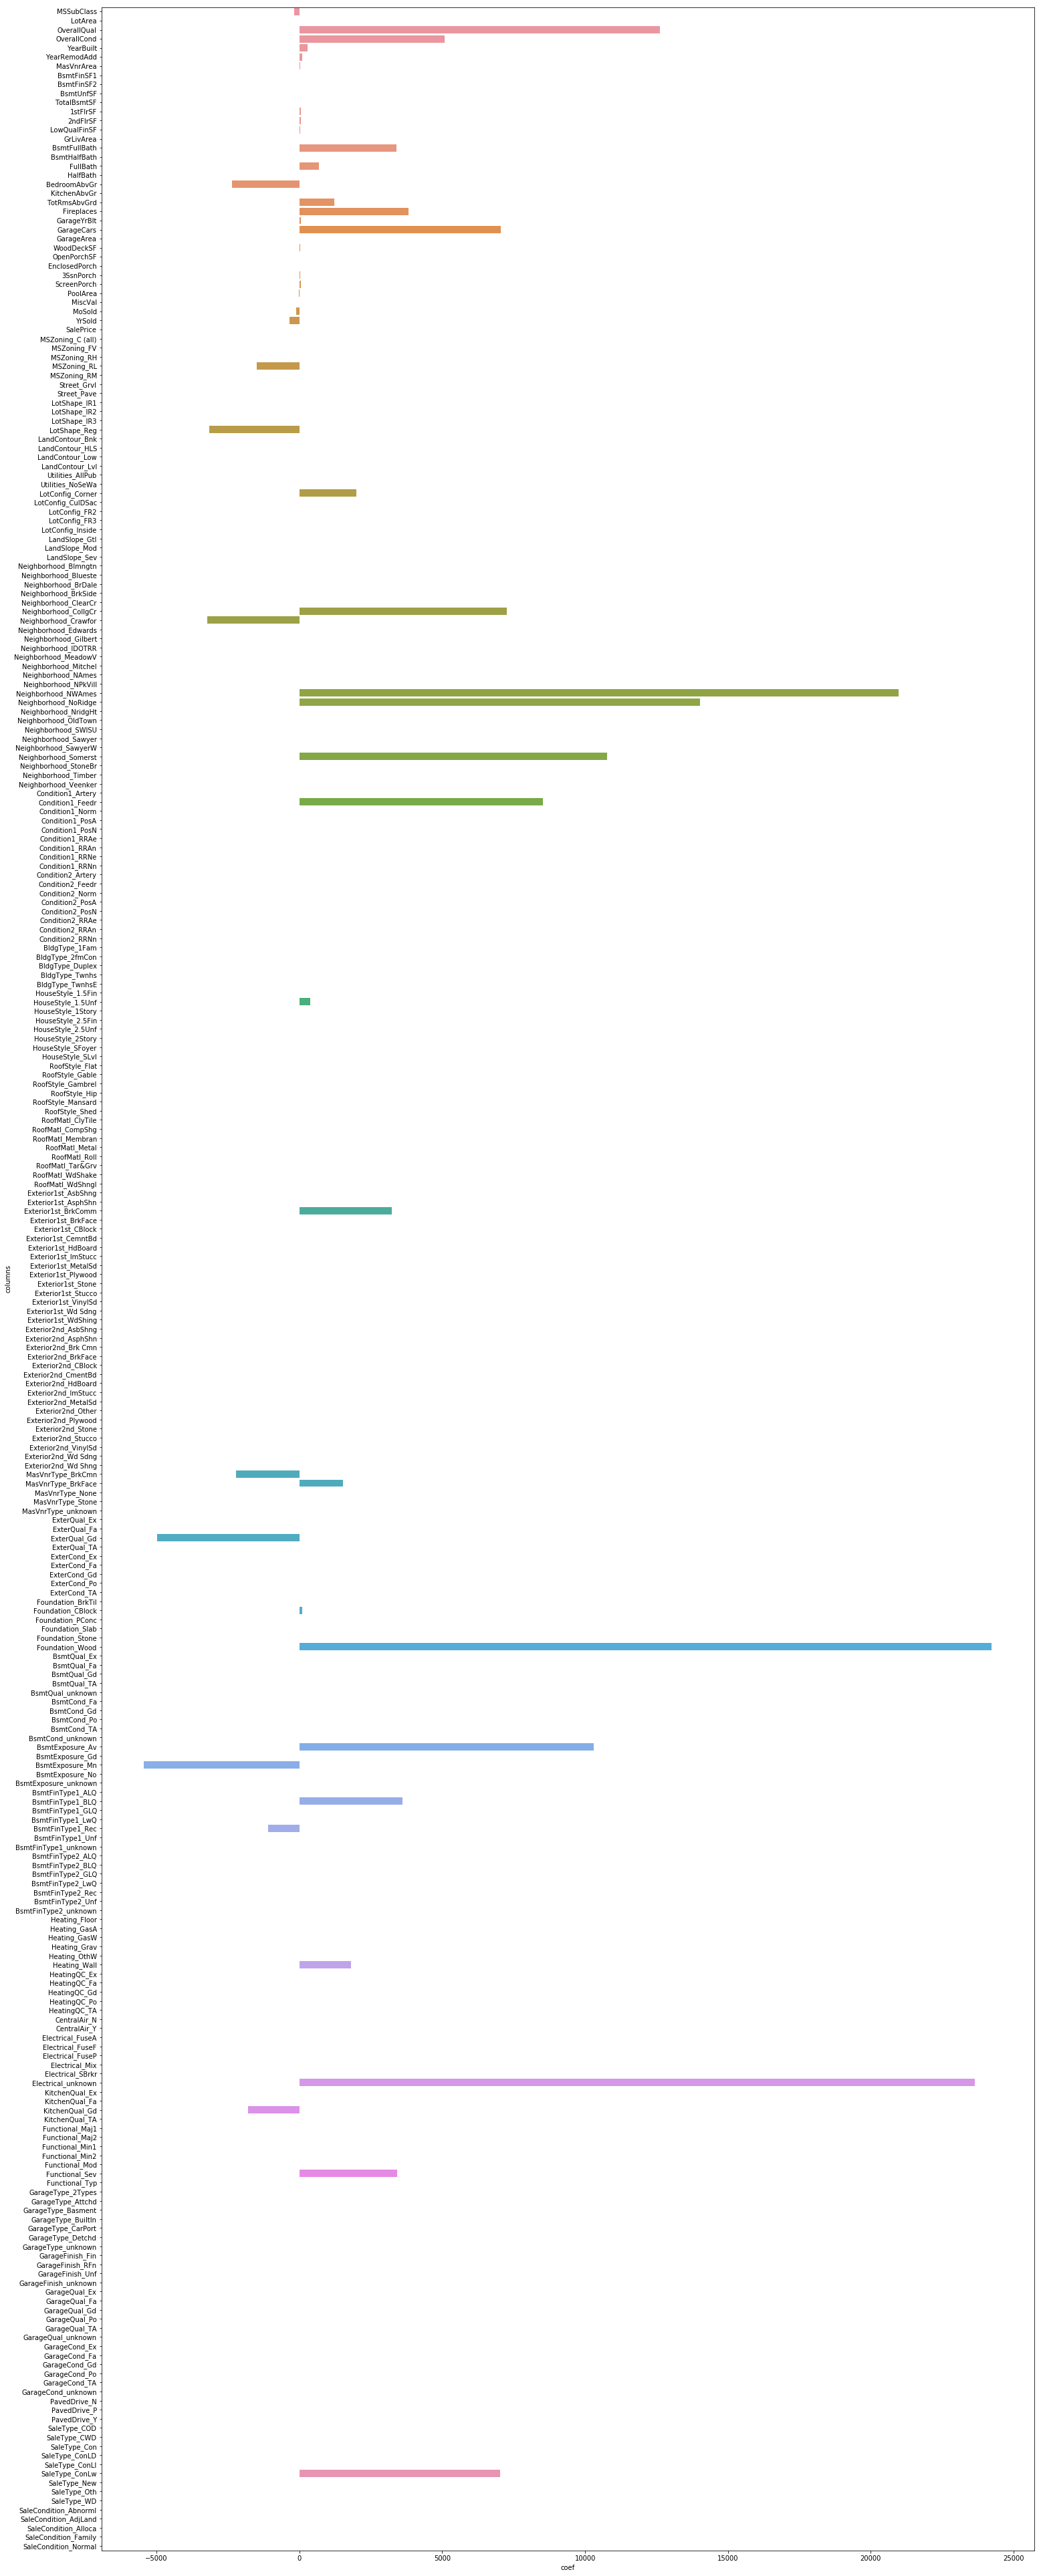

In [58]:
plt.figure(figsize=(25,70))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lasso.coef_, df_copy.columns)), columns=["coef", "columns"]))

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


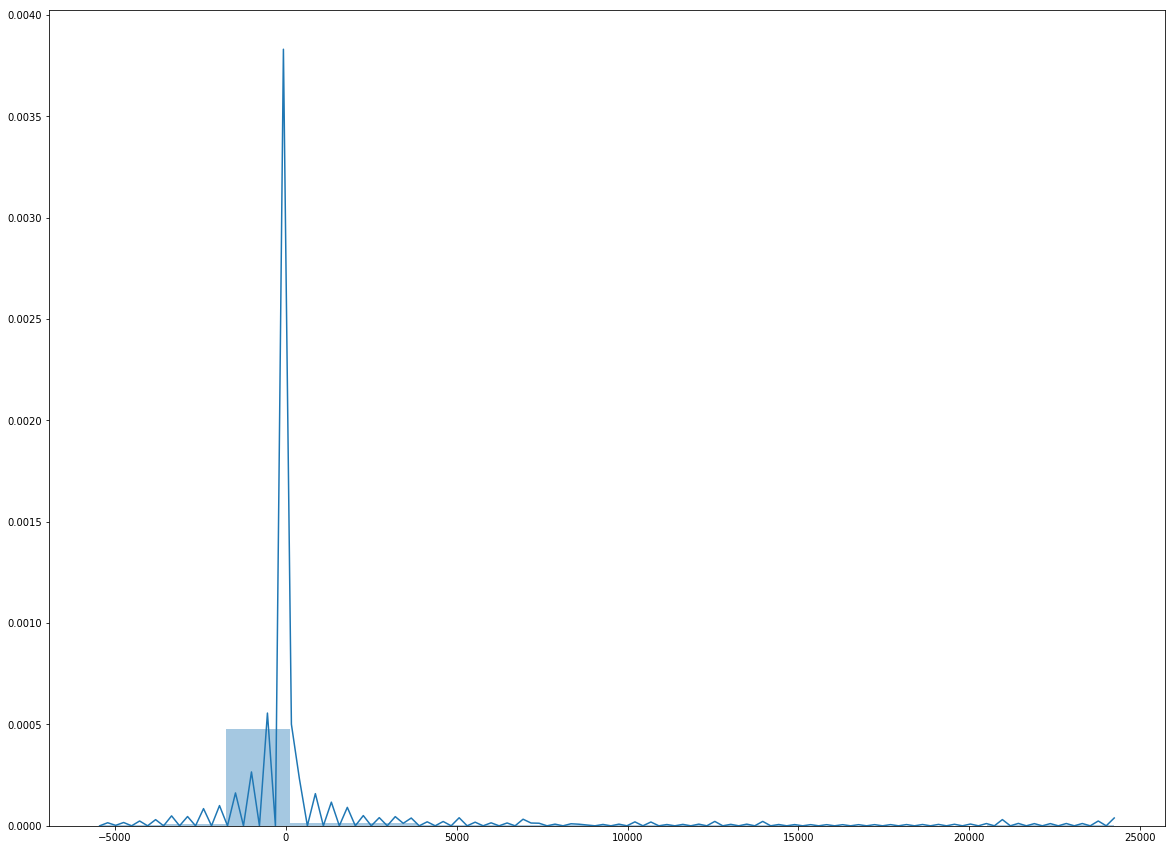

In [69]:
plt.figure(figsize=(20,15))
sns.distplot(lasso.coef_)

In [59]:
ridge = Ridge(alpha=alpha)
ridge.fit(X, y)

for coef, col in sorted(zip(ridge.coef_, df_copy.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    


0.384 	 LotArea
0.5226 	 BsmtExposure_Gd
-1.2299 	 MiscVal
-1.3225 	 BsmtUnfSF
-2.0681 	 OpenPorchSF
-2.7845 	 ExterCond_Gd
3.5467 	 BsmtFinSF2
3.586 	 HouseStyle_SLvl
-3.9825 	 BsmtQual_Ex
-4.1414 	 LowQualFinSF
-4.2202 	 Exterior2nd_Wd Sdng
4.398 	 SaleType_Con
-5.3667 	 GarageQual_Gd
6.5146 	 SaleType_ConLI
-9.1683 	 RoofStyle_Mansard
9.284 	 GarageYrBlt
9.5307 	 Exterior2nd_AsphShn
10.0195 	 BsmtFinSF1
10.7861 	 SaleType_New
11.3083 	 Exterior1st_HdBoard
-11.7252 	 Exterior1st_BrkFace
-11.7252 	 Exterior2nd_BrkFace
12.2437 	 TotalBsmtSF
13.373 	 Exterior2nd_Plywood
-13.9656 	 HeatingQC_Gd
-16.5464 	 MasVnrType_Stone
16.8056 	 1stFlrSF
-17.2122 	 Neighborhood_BrkSide
-17.9023 	 Neighborhood_Blmngtn
-18.7699 	 Exterior1st_WdShing
19.394 	 EnclosedPorch
-20.3442 	 Condition1_RRNe
21.0818 	 BsmtCond_Gd
21.667 	 2ndFlrSF
21.7523 	 Condition2_RRAn
23.5593 	 GarageQual_unknown
-23.5843 	 HouseStyle_1Story
-23.8426 	 Condition1_RRAe
26.4781 	 ExterCond_Po
26.4947 	 GarageArea
-26.5052 	 El

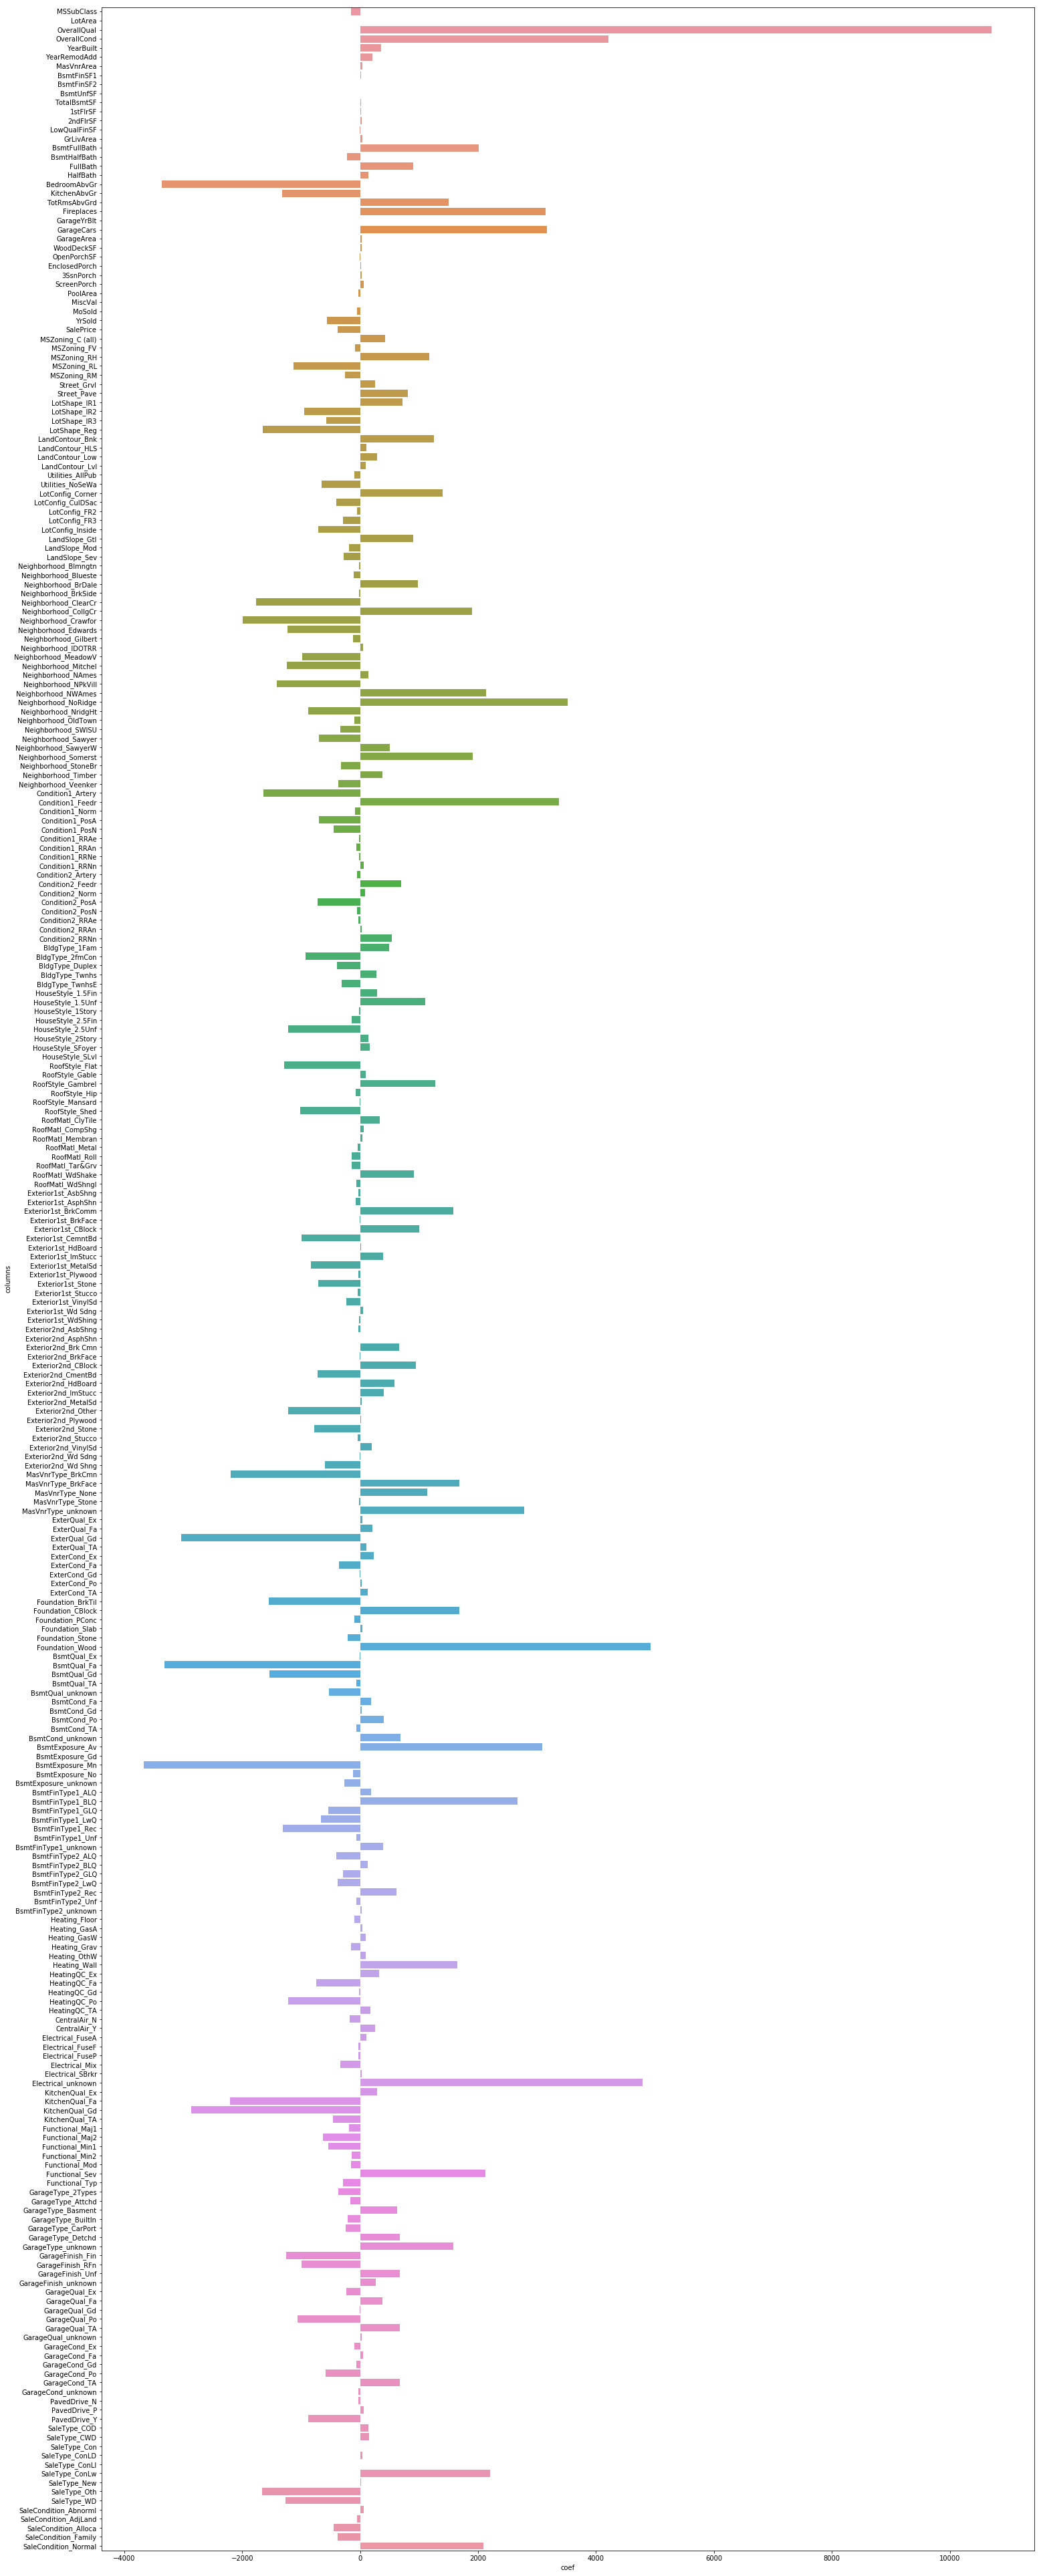

In [60]:

plt.figure(figsize=(25,70))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.coef_, df_copy.columns)), columns=["coef", "columns"]))


D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


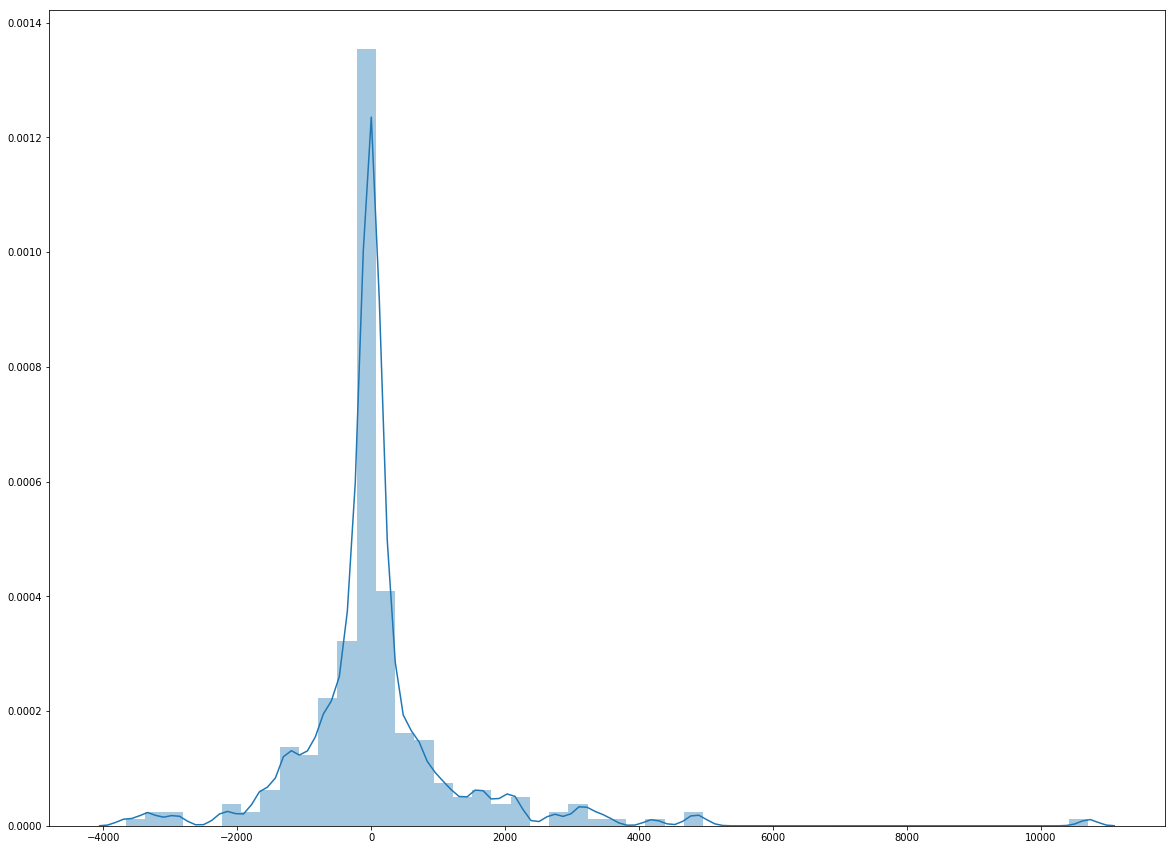

In [70]:
plt.figure(figsize=(20,15))
sns.distplot(ridge.coef_)

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [74]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X, y)
lasso_cv.score(X, y) 

0.7235987639844039

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


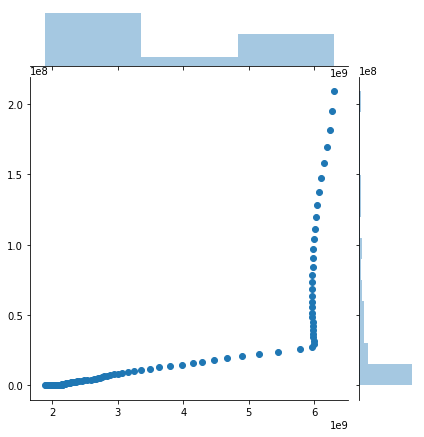

In [91]:
sns.jointplot(x=lasso_cv.mse_path_.mean(axis=1),y=lasso_cv.alphas_)

In [95]:
coef_no_zero = lasso_cv.coef_[lasso_cv.coef_ != 0.0]
coef_no_zero

array([ 2.87220895e-01,  3.10555397e+02,  1.14105225e+02,  3.77514015e+01,
        1.21612513e+01,  3.33582269e+01,  1.96972979e+00,  6.43224339e+01,
        6.80645659e+01,  2.94346964e+01, -1.38079718e-01])

In [94]:

errors = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')  
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))


[-8.25283878e+08 -1.17623540e+09 -1.41440984e+09 -5.70497624e+08
 -2.18007954e+09]
error=1233301257.107, std=554658957.3188


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True) 
#Оно же по умолчанию перемешивает

In [129]:
X_train.shape

(978, 280)

In [130]:
X_test.shape

(482, 280)

Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [131]:
las_cv = LassoCV(cv=5).fit(X_train, y_train)
y_pred = las_cv.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

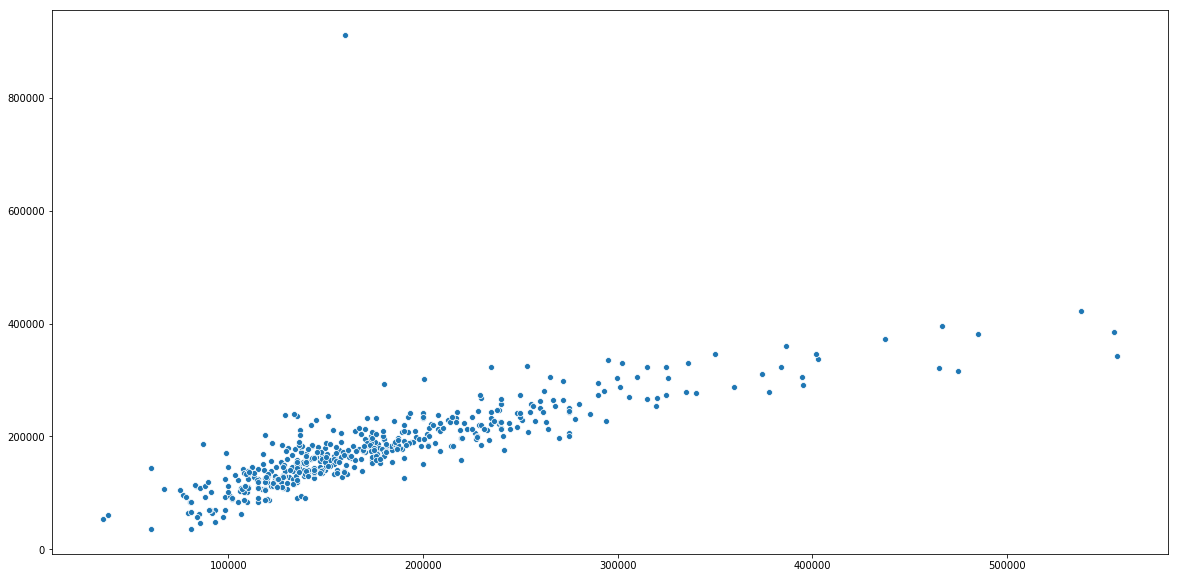

In [132]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=y_test, y=y_pred)
#Вообще тут 2 графика повторяются из-за рандома. Этот получше

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.